# Mermaid library

In [140]:
from BPTK_Py import bptk

bptk = bptk()

In [141]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [298]:
def mm(graph):
    graphbytes = graph.encode("ascii")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
flowchart TB
    c1-->a2
    subgraph one
    a1-->a2
    end
    subgraph two
    b1-->b2
    end
    subgraph three
    c1-->c2
    end

""")

In [299]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [300]:
model = Model(starttime=0.0,stoptime=120.0,dt=1.0,name='SimpleProjectManagament')

In [301]:
openTasks = model.stock("openTasks")

In [302]:
closedTasks = model.stock("closedTasks")
staff = model.stock("staff")
completionRate = model.flow("completionRate")
currentTime = model.converter("currentTime")
remainingTime = model.converter("remainingTime")
schedulePressure = model.converter("schedulePressure")
productivity = model.converter("productivity")
deadline = model.constant("deadline")
effortPerTask = model.constant("effortPerTask")
initialStaff = model.constant("initialStaff")
initialOpenTasks = model.constant("initialOpenTasks")

In [303]:
closedTasks.initial_value = 0.0
staff.initial_value = initialStaff
openTasks.initial_value = initialOpenTasks 

In [304]:
deadline.equation = 100.0
effortPerTask.equation = 1.0
initialStaff.equation = 1.0
initialOpenTasks.equation = 100.0

In [305]:
currentTime.equation=sd.time()

In [306]:
remainingTime.equation = deadline - currentTime

In [307]:
openTasks.equation = -completionRate

In [308]:
closedTasks.equation = completionRate

In [309]:
model.points["productivity"] = [
    [0,0.4],
    [0.25,0.444],
    [0.5,0.506],
    [0.75,0.594],
    [1,1],
    [1.25,1.119],
    [1.5,1.1625],
    [1.75,1.2125],
    [2,1.2375],
    [2.25,1.245],
    [2.5,1.25]
]

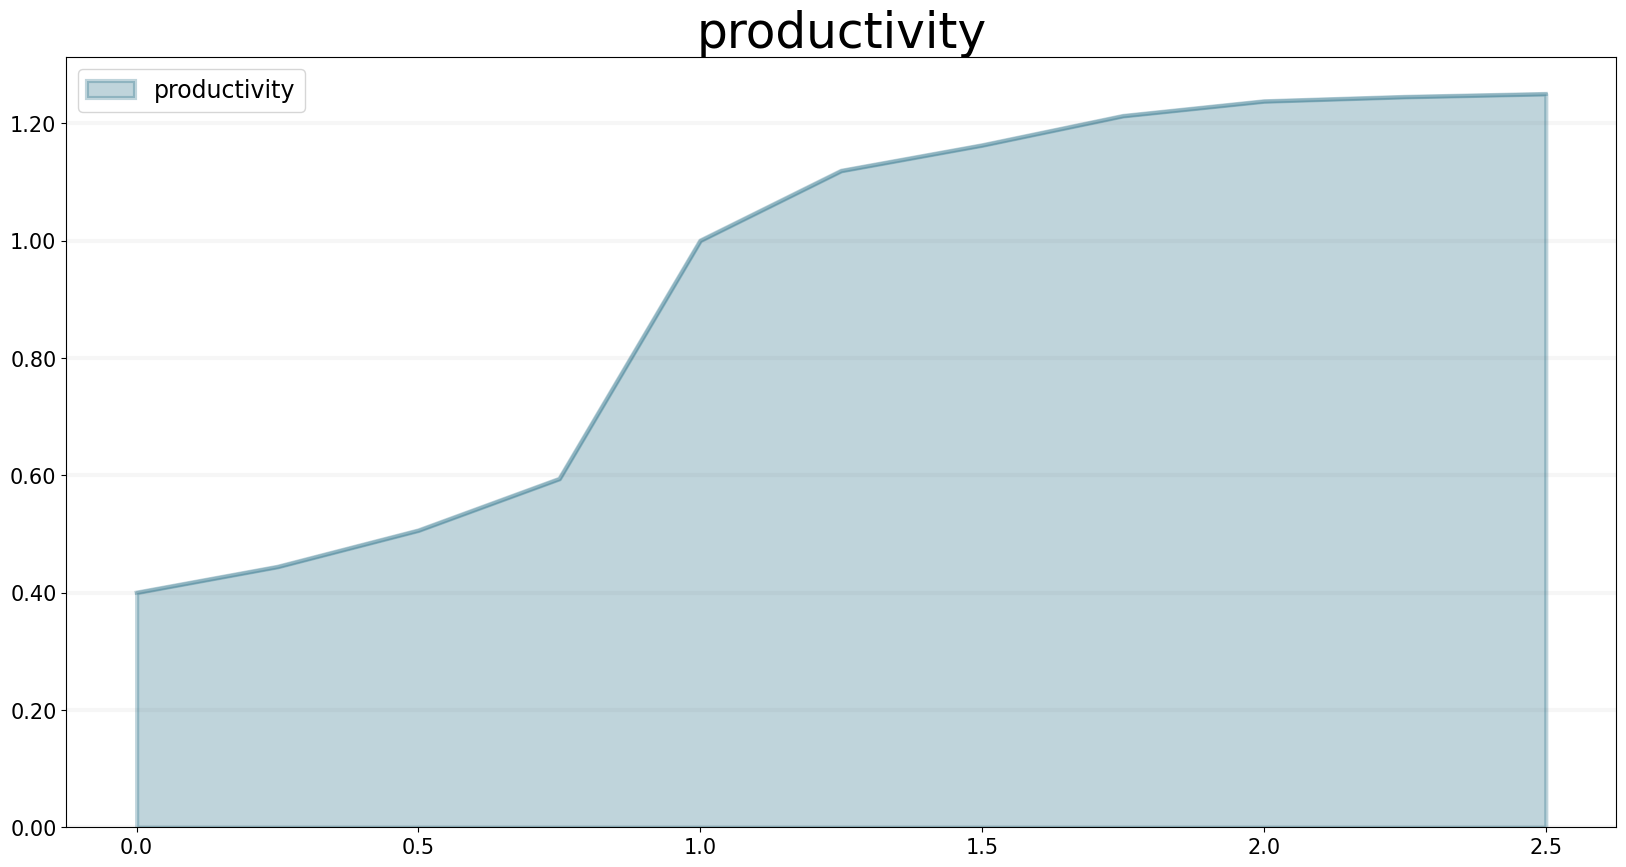

In [310]:
model.plot_lookup("productivity")